<a href="https://colab.research.google.com/github/DataExplorator/rcode/blob/main/Solution_Multi_Channel_Venn_Diagrams_Using_the_ggVennDiagram_R_Package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What Percentage of Your Site Traffic is Landing on Page Through Multiple Channels?**

---------------
## **Context**
---------------

This analysis is a bit of a play on the Markov chain concept, `which aims to distribute the credit evenly across your multiple marketing touchpoints`. However, the goal here is not to assign conversion credit but to `understand the path users / your customers are taking en route to your site`. 

Obviously, the singular paths see the bulk of the volume, but you will also observe an overlap across certain channels. For example, you may see a strong/weak overlap between Organic Search and Social, `meaning a significant portion of your traffic is using both paths en route to your site or vice versa`.

-----------------
## **Data Dictionary**
-----------------

The data comes from `Google's BiqQuery public Google analytics table`, and contains the following fields:
 - `fullVisitorId` - The uniquie id assigned to each visitor
 - `channelGrouping` - The channel through which they're accessing the website
 - `pageviews` - The total number if pages viewed per user

But let's go ahead and see how we can get something like this done...

## **Confirm Your Instance of R**

Let's start by confirming the instance of R we are running. This is not mandatory, but different instances might call for different code chunks.

In [4]:
# Confirming the R instance your running
R.version.string

[1] "R version 4.2.2 Patched (2022-11-10 r83330)"

## **Installing sf-package**

We are separating these packages because the subsequent packages below have dependencies to the "sf" package directly below.

In [5]:
# system("apt-get -y update")
system("apt-get install -y libudunits2-dev libgdal-dev libgeos-dev libproj-dev")
install.packages("sf")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## **Installing other packages**

Now, let's install the remaining packages...

In [6]:
install.packages("ggVennDiagram")
install.packages("bigrquery")
install.packages("plotly")
install.packages("googledrive")
install.packages("csv")
install.packages("janitor")
install.packages("knitr")
install.packages("stringr")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## **Load libraries**

Now that we've installed the requisite packages, let's go ahead and load the libraries needed for the analysis.

In [7]:
library("sf") 
library("units")
library("ggplot2")   
library("ggVennDiagram")
library("readr")
library("tidyr")
library("tidyverse")
library("readxl")
library("csv")
library("janitor")
library("knitr")
library("googledrive")
library("stringr")
library("dplyr")
library("bigrquery")

Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.1; sf_use_s2() is TRUE

udunits database from /usr/share/xml/udunits/udunits2.xml

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.8     ✔ stringr 1.5.0
✔ purrr   1.0.1     ✔ forcats 0.5.2
✔ dplyr   1.1.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




## **Importing & Preparing Data**

Let’s upload the data from your desktop. There’s also a way to bring the data in directly from GDrive, but that's quite involved, so this is the easiest workaround.

### **Importing To R Environment**

The code chunk below allows you to read the data into the R environment once you've uploaded it from a desktop.

In [9]:
# Importing the dataset
df = read_csv('channelGrouping.csv')

# Convert saids to random numbers
df = df %>% 
  mutate(
    fullVisitorId = as.factor(fullVisitorId),
    fullVisitorId = as.numeric(fullVisitorId))

Rows: 377295 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): fullVisitorId, channelGrouping
dbl (1): pageviews

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### **Previewing The Data**

In [10]:
# Let's preview the data
head(df,n=4)

# You can also preview the tail
# tail(df,n=2)

fullVisitorId,channelGrouping,pageviews
<dbl>,<chr>,<dbl>
365289,Organic Search,2
365288,Organic Search,1
365287,Organic Search,3
365286,Organic Search,1


## **Exploring The Data**

In [11]:
dim(df)

[1] 377295      3

##### **Observations and Insights:**

The dataset has **`377295 rows`** and **`3 columns`**.

In [12]:
str(df)

tibble [377,295 × 3] (S3: tbl_df/tbl/data.frame)
 $ fullVisitorId  : num [1:377295] 365289 365288 365287 365286 365285 ...
 $ channelGrouping: chr [1:377295] "Organic Search" "Organic Search" "Organic Search" "Organic Search" ...
 $ pageviews      : num [1:377295] 2 1 3 1 2 1 4 9 1 1 ...


##### **Observations and Insights:**

You can see that the dataset is of the **`object`**, and **`numeric`** types. 
- Just the formats we need, so there"s no further conversion needed.

In [13]:
sum(is.na(df))

[1] 0

##### **Observations and Insights:**

If you change the column in the code above, you will find that our dataset has no missing values.

In [14]:
summary(df)

 fullVisitorId    channelGrouping      pageviews       
 Min.   :     1   Length:377295      Min.   :   1.000  
 1st Qu.: 91372   Class :character   1st Qu.:   1.000  
 Median :182693   Mode  :character   Median :   2.000  
 Mean   :182658                      Mean   :   4.673  
 3rd Qu.:273948                      3rd Qu.:   4.000  
 Max.   :365289                      Max.   :1998.000  

##### **Observations and Insights:**

As we can see, the mean of the `pageviews` column is **`4.7`**, a median of **`2`**, and a max of **`1998`.**

#### **Inspecting Data Further To Gauge Volume**

In [15]:
# Let's inspect further to gauge volume
table(df$channelGrouping)


       (Other)     Affiliates         Direct        Display Organic Search 
            84           7925          68404           2114         194181 
   Paid Search       Referral         Social 
         10669          38432          55486 

##### **Observations and Insights:**

You can see the volume of users who saw a specific product (for example, `10,669` users landing on site via the `Paid Search` channel). 

- Please note that there are overlaps in these groups. So you'll need the steps below to segment further.

## **Fix Large Number Formatting**

Sometimes, large numbers can be denoted in scientific notations. The code directly below should help fix that if you have numbers in the millions.

In [16]:
# Let's fix the output's legend
options(scipen = 999) 
10000000

[1] 10000000

## **Data Preprocessing**

This step preps your data for computation and visualization

In [17]:
categories = df %>% distinct(channelGrouping) %>% pull(channelGrouping)

x = list()

for(i in 1:length(categories)){
  
  CAT = categories[i]
  
  
  tmp = df %>% 
    filter(channelGrouping == CAT) %>% 
    distinct(fullVisitorId) %>% 
    mutate(fullVisitorId = as.character(fullVisitorId)) 
  
  x = append(x, tmp)
  
}

#### **Let's Test Our Code Above**

You can now test whatever combination you want, keeping in mind that `the ggVennDiagram package only accommodates up to seven (7) combinations`. 

To change the number of combinations, simply change `"2"` for `x` and the `categories to the number of combinations you want to see`.

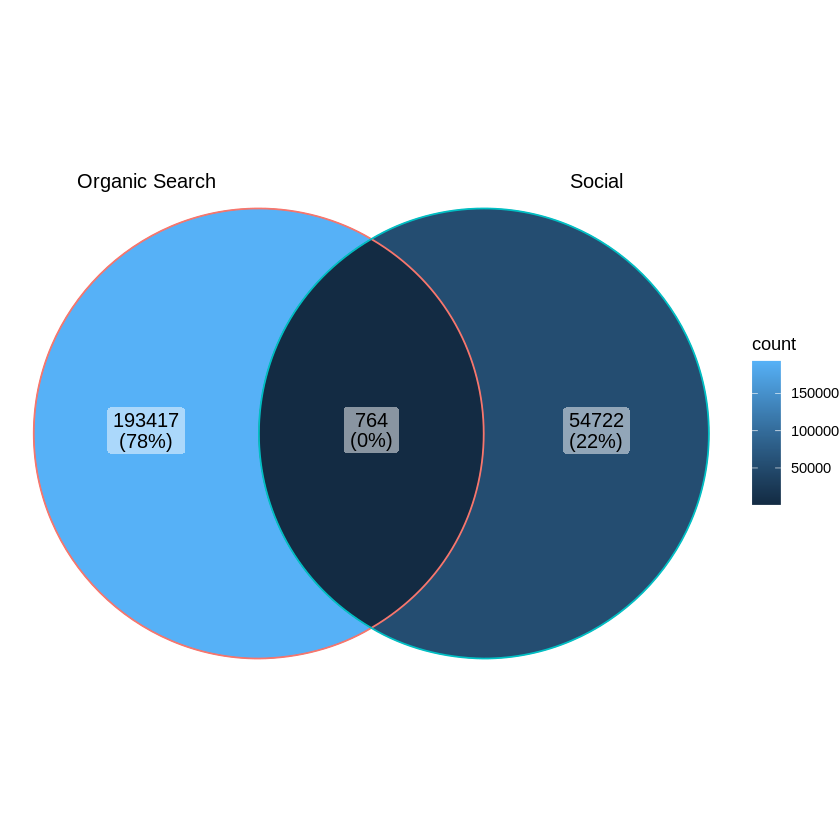

In [18]:
ggVennDiagram(x[1:2], category.names = categories[1:2])

##### **Observations and Insights:**

The code is doing what we want, but further customizations are needed to take this to the next level.

## **Customizing The Output**

Now, let's improve the esthetics and make the two channel diagram easier to digest.

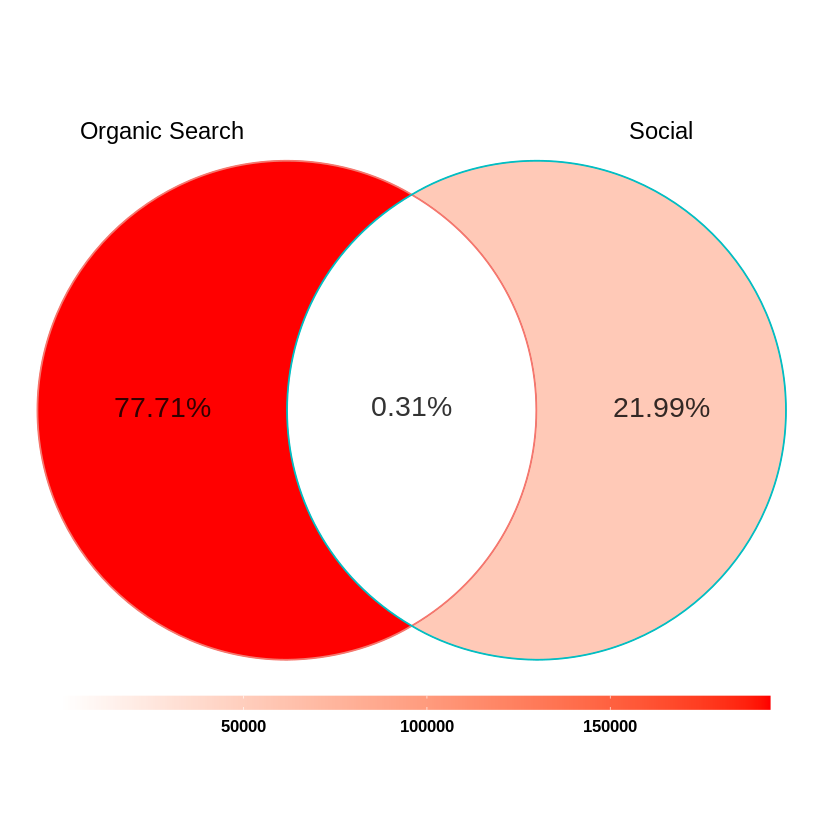

In [19]:
# Change diagram size and values
a = ggVennDiagram(x[1:2],

  label_alpha = 0.8, 
  label = "percent",
  label_color = "black",
  label_percent_digit = 2,
  label_size = 6,
  label_geom = "text",
  
  # change diagram width
  # edge_size = 1,

  # edit / change channel details
  category.names = categories[1:2],
  set_size = 5,
  set_color = "black") +
    
  # Change the gradient fill color
  scale_fill_gradient(low = "white", high = "red") + 
  
  # change scale color
  # scale_colour_viridis_d(begin = 0.2, end = 0.8) +
  # scale_color_brewer(palette = "Set2") +

  # edit / change the plot theme
  theme(
    plot.margin = margin(r = 10, l = 0),
    legend.position = "bottom",
    legend.key.width  = unit(3, 'cm'),
    legend.key.height  = unit(0.3, 'cm'),
    legend.text = element_text(color = "black", size = 10, face = "bold"),
    # legend.title = element_text(color = "black", size = 10, face = "bold"),
    legend.title = element_blank())

# change background color
a + theme(plot.background = element_rect(fill = "white", color = "white")) 

##### **Observations and Insights:**

This is simply a better output and allows you to see what's happening clearly.

What we can see from the two-way diagram is that `less than 1% of users` who landed on site through both the `Organic Search` and `Social` channels came through both.
- This means that there's very low overlap between both channels.
- Users are more likely to land on site via `Organic Search` relative to `Social`

## **Three (3) Channels Overlap**

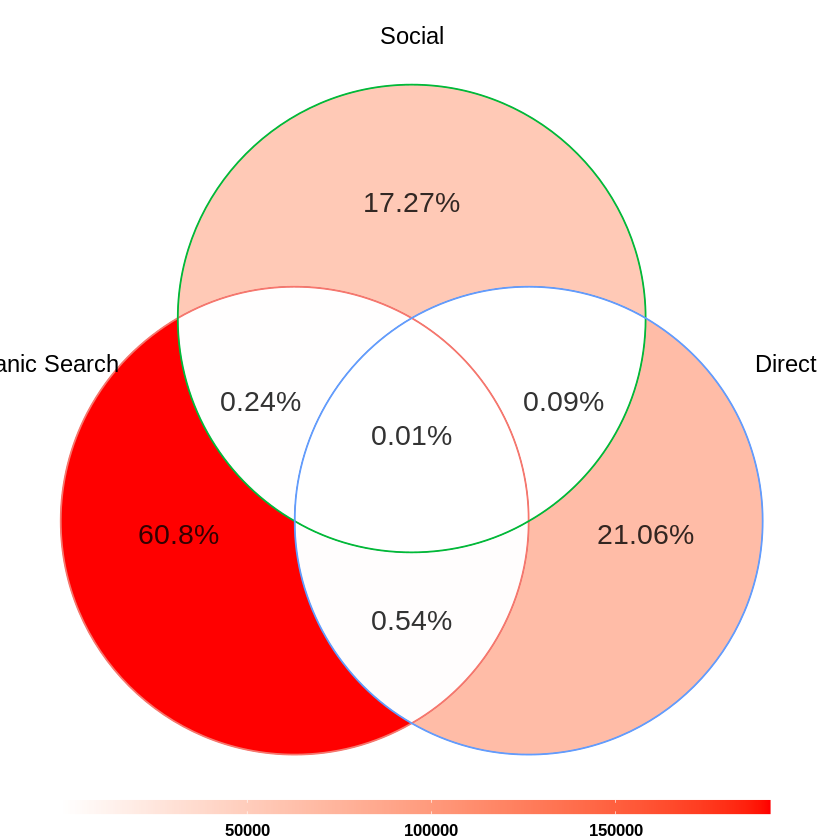

In [20]:
# Change diagram size and values
b = ggVennDiagram(x[1:3],

  label_alpha = 0.8, 
  label = "percent",
  label_color = "black",
  label_percent_digit = 2,
  label_size = 6,
  label_geom = "text",
  
  # change diagram width
  # edge_size = 1,

  # edit / change channel details
  category.names = categories[1:3],
  set_size = 5,
  set_color = "black") +
    
  # Change the gradient fill color
  scale_fill_gradient(low = "white", high = "red") + 
  
  # change scale color
  # scale_colour_viridis_d(begin = 0.2, end = 0.8) +
  # scale_color_brewer(palette = "Set2") +

  # edit / change the plot theme
  theme(
    plot.margin = margin(r = 10, l = 0),
    legend.position = "bottom",
    legend.key.width  = unit(3, 'cm'),
    legend.key.height  = unit(0.3, 'cm'),
    legend.text = element_text(color = "black", size = 10, face = "bold"),
    # legend.title = element_text(color = "black", size = 10, face = "bold"),
    legend.title = element_blank())

# change background color
b + theme(plot.background = element_rect(fill = "white", color = "white"))

##### **Observations and Insights:**

What we can see from the three-way diagram is that only `0.01%` of users who landed on site through the `Organic Search`, `Social`, and `Direct` channels used all three channels.
- This means that there's very low overlap between the channels.
- Users are more likely to land on site via `Organic Search`, and `Direct` relative to `Social`.
- The largest overlap is happening between `Organic Search`, and `Direct` channels.

## **Four (4) Channels Overlap**

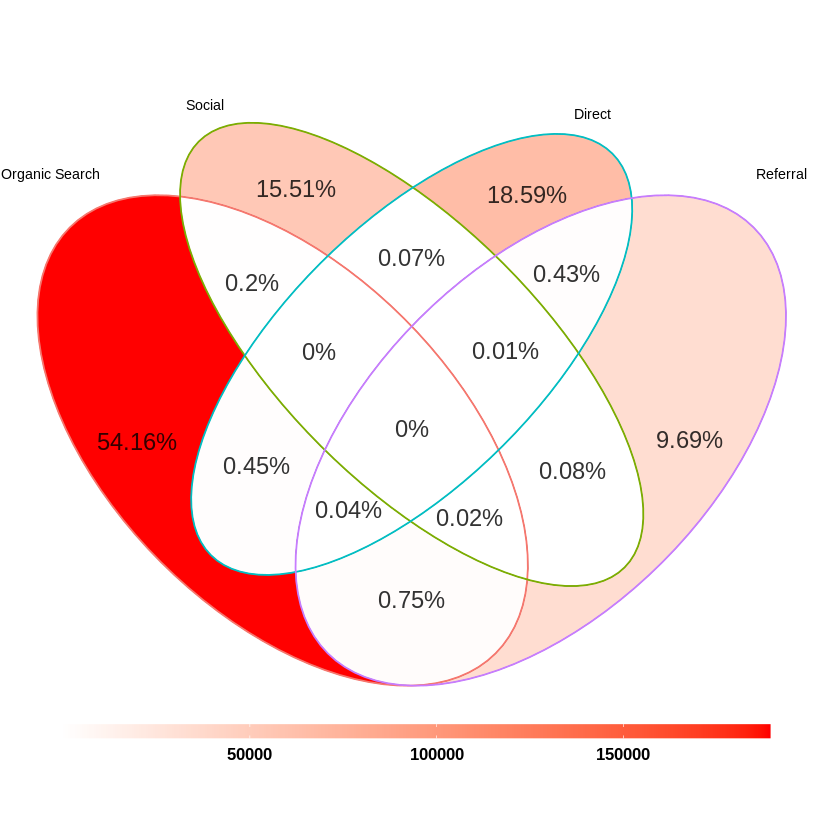

In [21]:
# Change diagram size and values
c = ggVennDiagram(x[1:4],

  label_alpha = 0.8, 
  label = "percent",
  label_color = "black",
  label_percent_digit = 2,
  label_size = 5,
  label_geom = "text",
  
  # change diagram width
  # edge_size = 1,

  # edit / change channel details
  category.names = categories[1:4],
  set_size = 3,
  set_color = "black") +
    
  # Change the gradient fill color
  scale_fill_gradient(low = "white", high = "red") + 
  
  # change scale color
  # scale_colour_viridis_d(begin = 0.2, end = 0.8) +
  # scale_color_brewer(palette = "Set2") +

  # edit / change the plot theme
  theme(
    plot.margin = margin(r = 10, l = 0),
    legend.position = "bottom",
    legend.key.width  = unit(3, 'cm'),
    legend.key.height  = unit(0.3, 'cm'),
    legend.text = element_text(color = "black", size = 10, face = "bold"),
    # legend.title = element_text(color = "black", size = 10, face = "bold"),
    legend.title = element_blank())

# change background color
c + theme(plot.background = element_rect(fill = "white", color = "white"))

##### **Observations and Insights:**

What we can see from the four-way diagram is that `0%` of users who landed on site through these channels used all four channels.
- This means that there's no overlap between the channels.
- Users are more likely to land on site via `Organic Search`, `Direct`, and `Social` relative to `Referral`.
- The largest overlap is happening between `Organic Search`, and `Referral` channels.

## **Five (5) Channels Overlap**

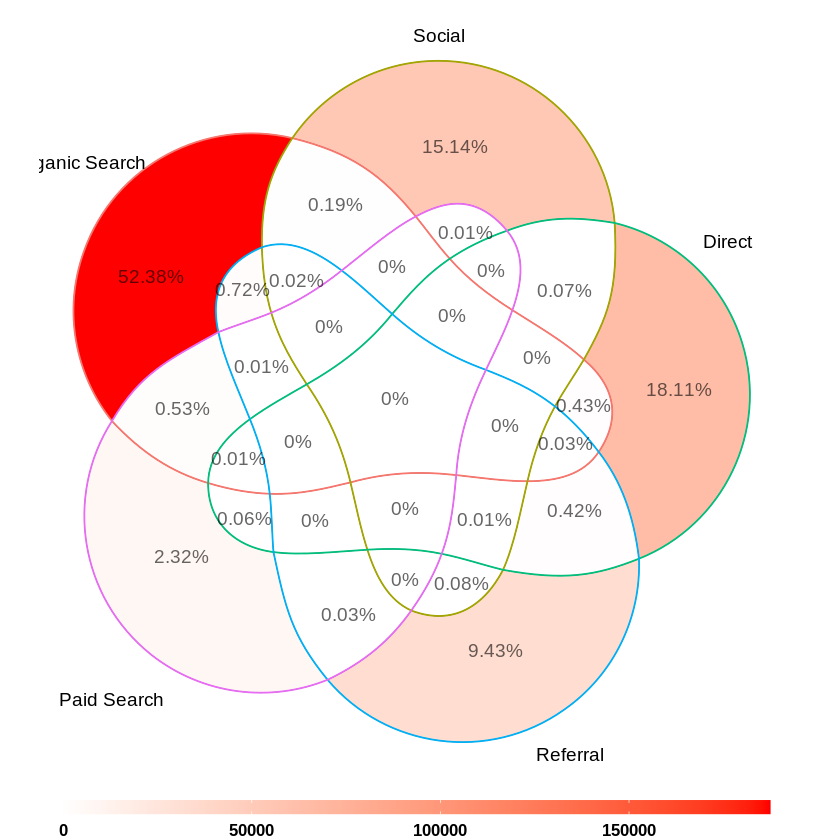

In [22]:
# Change diagram size and values
d = ggVennDiagram(x[1:5],

  label_alpha = 0.6, 
  label = "percent",
  label_color = "black",
  label_percent_digit = 2,
  label_size = 4,
  label_geom = "text",
  
  # change diagram width
  # edge_size = 1,

  # edit / change channel details
  category.names = categories[1:5],
  set_size = 4,
  set_color = "black") +
    
  # Change the gradient fill color
  scale_fill_gradient(low = "white", high = "red") + 
  
  # change scale color
  # scale_colour_viridis_d(begin = 0.2, end = 0.8) +
  # scale_color_brewer(palette = "Set2") +

  # edit / change the plot theme
  theme(
    plot.margin = margin(r = 10, l = 0),
    legend.position = "bottom",
    legend.key.width  = unit(3, 'cm'),
    legend.key.height  = unit(0.3, 'cm'),
    legend.text = element_text(color = "black", size = 10, face = "bold"),
    # legend.title = element_text(color = "black", size = 10, face = "bold"),
    legend.title = element_blank())

# change background color
d + theme(plot.background = element_rect(fill = "white", color = "white"))

##### **Observations and Insights:**

What we can see from the five-way diagram is that `0%` of users who landed on site through these channels used all five channels.
- This means that there's no overlap between the channels.
- Users are more likely to land on site via `Organic Search`, `Direct`, `Social`, `Referral`, and lastly `Paid Search`.
- The largest overlap `(0.72%)` is happening between `Organic Search`, and `Referral` channels.

## **Six (6) Channels Overlap**

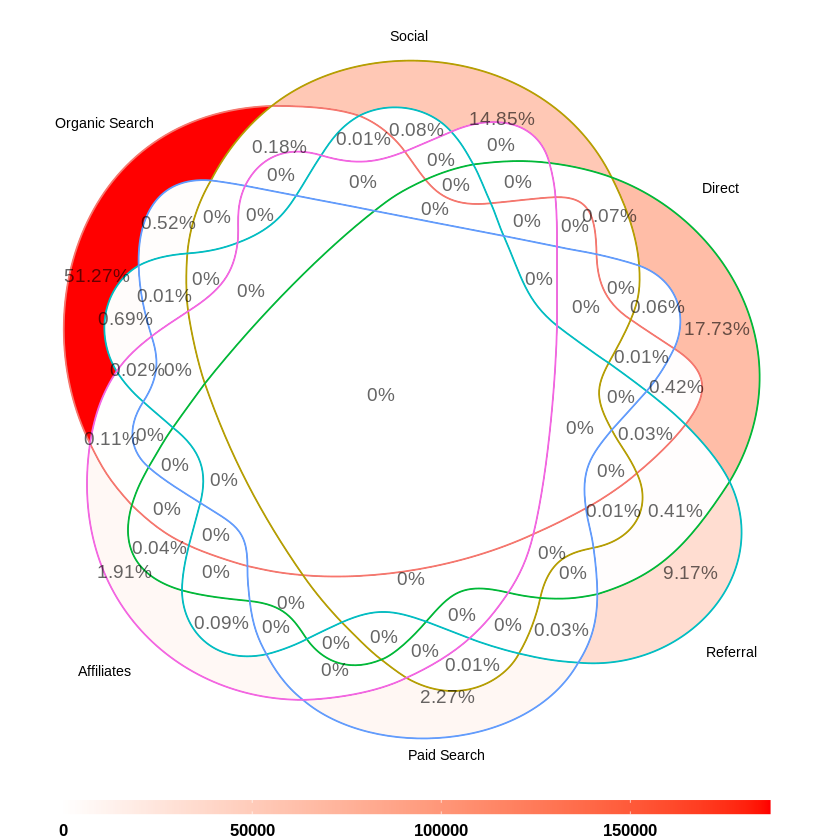

In [23]:
# Change diagram size and values
e = ggVennDiagram(x[1:6],

  label_alpha = 0.6, 
  label = "percent",
  label_color = "black",
  label_percent_digit = 2,
  label_size = 4,
  label_geom = "text",
  
  # change diagram width
  # edge_size = 1,

  # edit / change channel details
  category.names = categories[1:6],
  set_size = 3,
  set_color = "black") +
    
  # Change the gradient fill color
  scale_fill_gradient(low = "white", high = "red") + 
  
  # change scale color
  # scale_colour_viridis_d(begin = 0.2, end = 0.8) +
  # scale_color_brewer(palette = "Set2") +

  # edit / change the plot theme
  theme(
    plot.margin = margin(r = 10, l = 0),
    legend.position = "bottom",
    legend.key.width  = unit(3, 'cm'),
    legend.key.height  = unit(0.3, 'cm'),
    legend.text = element_text(color = "black", size = 10, face = "bold"),
    # legend.title = element_text(color = "black", size = 10, face = "bold"),
    legend.title = element_blank())

# change background color
e + theme(plot.background = element_rect(fill = "white", color = "white"))

##### **Observations and Insights:**

What we can see from the six-way diagram is that `0%` of users who landed on site through these channels used all six channels.
- This means that there's no overlap between all of the channels.
- Users are more likely to land on site via `Organic Search`, `Direct`, `Social`, `Referral`, `Paid Search`, and lastly `Affiliates`.
- The largest overlap `(0.69%)` is happening between `Organic Search`, and `Referral` channels.
- But there's also a notable overlap between the `Organic Search`, and `Paid Search` channels, which is not suprising given the nature of search.

## **Seven (7) Channels Overlap**

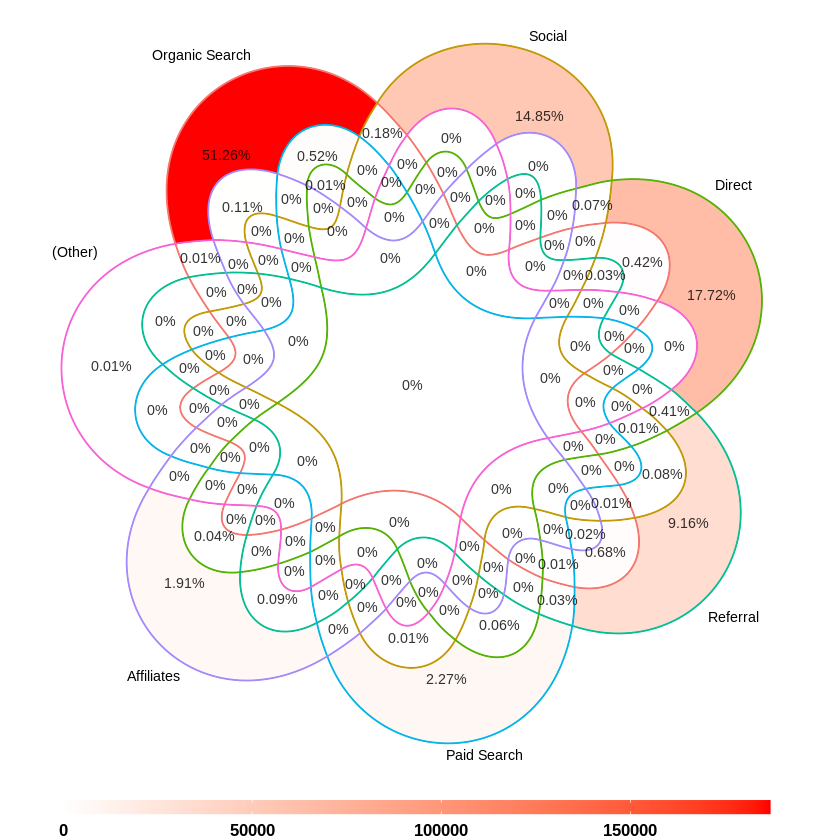

In [24]:
# Change diagram size and values
f = ggVennDiagram(x[1:7],

  label_alpha = 0.8, 
  label = "percent",
  label_color = "black",
  label_percent_digit = 2,
  label_size = 3,
  label_geom = "text",
  
  # change diagram width
  # edge_size = 1,

  # edit / change channel details
  category.names = categories[1:7],
  set_size = 3,
  set_color = "black") +
    
  # Change the gradient fill color
  scale_fill_gradient(low = "white", high = "red") + 
  
  # change scale color
  # scale_colour_viridis_d(begin = 0.2, end = 0.8) +
  # scale_color_brewer(palette = "Set2") +

  # edit / change the plot theme
  theme(
    plot.margin = margin(r = 10, l = 0),
    legend.position = "bottom",
    legend.key.width  = unit(3, 'cm'),
    legend.key.height  = unit(0.3, 'cm'),
    legend.text = element_text(color = "black", size = 10, face = "bold"),
    # legend.title = element_text(color = "black", size = 10, face = "bold"),
    legend.title = element_blank())

# change background color
f + theme(plot.background = element_rect(fill = "white", color = "white"))

##### **Observations and Insights:**

What we can see from the seven-way diagram is that `0%` of users who landed on site through these channels used all seven channels.
- This means that there's no overlap between all of the channels.
- Users are more likely to land on site via `Organic Search`, `Direct`, `Social`, `Referral`, `Paid Search`, `Affiliates`, and lastly `Other`.
- The largest overlap `(0.68%)` is happening between `Organic Search`, and `Referral` channels.
- But there's also a notable overlap between the `Organic Search`, and `Paid Search` channels, which is not suprising given the nature of search.

---------------
## **Conclusion**
---------------

<br>

Using the `ggVennDiagram` package, we were able to conduct an analysis that allowed us to learn the following:

- There's no overlap between all of the channels
- Users are more likely to land on site via `Organic Search`, `Direct`, `Social`, `Referral`, `Paid Search`, `Affiliates`, and lastly `Other`.
- The largest overlap `(0.68%)` is happening between `Organic Search`, and `Referral` channels.
- But there's also a notable overlap `(0.52%)` between the `Organic Search`, and `Paid Search` channels, which is not suprising given the nature of search.

<br>

---------------
## **Recommendations for the Business**
---------------

<br>

This analysis allows you to better understand the `percentages of your business's traffic coming through a particular combination of channels`. You can certainly stop here if this is all the info your team needs to refocus your strategy. If so, you can do a few thing with this information:

- Tweaking your strategy to lean more `organic search`, since it's doing such a great job driving traffic for the business; keeping in mind that it's less costly relative to other channels.
- Focus on improving your `Paid Search`, and `Affiliates` presence since they don't seem on par with other promiment strategies.

<br>

---------------
## **Recommendation for Further Analysis**
---------------

<br>

However, I would take this analysis a step further by `zooming in on those users who are landing on your website through a combination of channels`. Are they more likely to `convert or take action at a higher rate`? If so, `how would you adjust your strategy to make sure you're driving more users through those channels`?

<br>


## **Sources / additional resources**

- [ggVennDiagram Package Resources](https://cran.r-project.org/web/packages/ggVennDiagram/readme/README.html)